### 2 Дана выборка из распределения Пуассона𝑋1,...,𝑋𝑛∼𝑃𝑜𝑖(𝜆).Рассмотрим два способа оценки параметра𝜆:𝜆=𝑋𝑛и𝜆=𝑆2.Сгенерировать выборку при𝜆= 17и𝑛= 10015 раз, в каждомслучае оценить абсолютную погрешность обеих оценок (|𝑋𝑛−𝜆|,|𝑆2−𝜆|). Какая из оценок в большинстве случаев точнее?

In [42]:
import pandas as pd
import numpy as np
from scipy.stats import poisson
import seaborn as sns
import matplotlib.pyplot as plt

Lambda = 17
rv = poisson(Lambda)

df = pd.DataFrame()
for i in range (15):
    df[i] = rv.rvs(size = 100)


In [33]:
df.loc['mean'] = df.mean()
df.loc['S^2'] = df.std()**2


In [34]:
df.loc['mean - Lambda'] = np.abs(df.loc['mean'] - Lambda)
df.loc['S^2 - Lambda'] = np.abs(df.loc['S^2'] - Lambda)

### 4 Используя файл breast_cancer_1000_genes.tsv, найти топ-10наиболее постоянных генов, используя разность максимума иминимума, дисперсию и интерквартильный размах. Для каждогоиз трех случаев нарисовать boxplot по 10 найденным генам,интерпретировать результат.

In [54]:
df1 = pd.read_csv('https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar11/breast_cancer_1000_genes.tsv', sep = '\t', index_col = 0)
# гены по вертикали (1), пробы больных по горизонтали(0)
df1.head()

,TCGA-3C-AAAU-01A,TCGA-3C-AALI-01A,TCGA-3C-AALJ-01A,TCGA-3C-AALK-01A,TCGA-4H-AAAK-01A,TCGA-5L-AAT0-01A,TCGA-5L-AAT1-01A,TCGA-5T-A9QA-01A,TCGA-A1-A0SB-01A,TCGA-A1-A0SD-01A,TCGA-A1-A0SE-01A,TCGA-A1-A0SF-01A,TCGA-A1-A0SG-01A,TCGA-A1-A0SH-01A,TCGA-A1-A0SI-01A,TCGA-A1-A0SJ-01A,TCGA-A1-A0SK-01A,TCGA-A1-A0SM-01A,TCGA-A1-A0SN-01A,TCGA-A1-A0SO-01A,TCGA-A1-A0SP-01A,TCGA-A1-A0SQ-01A,TCGA-A2-A04N-01A,TCGA-A2-A04P-01A,TCGA-A2-A04Q-01A,TCGA-A2-A04R-01A,TCGA-A2-A04T-01A,TCGA-A2-A04U-01A,TCGA-A2-A04V-01A,TCGA-A2-A04W-01A,TCGA-A2-A04X-01A,TCGA-A2-A04Y-01A,TCGA-A2-A0CK-01A,TCGA-A2-A0CL-01A,TCGA-A2-A0CM-01A,TCGA-A2-A0CO-01A,TCGA-A2-A0CP-01A,TCGA-A2-A0CQ-01A,TCGA-A2-A0CR-01A,TCGA-A2-A0CS-01A,...,TCGA-A2-A0EU-01A,TCGA-A2-A0EV-01A,TCGA-A2-A0EW-01A,TCGA-A2-A0EX-01A,TCGA-A2-A0EY-01A,TCGA-A2-A0ST-01A,TCGA-A2-A0SU-01A,TCGA-A2-A0SV-01A,TCGA-A2-A0SW-01A,TCGA-A2-A0SX-01A,TCGA-A2-A0SY-01A,TCGA-A2-A0T0-01A,TCGA-A2-A0T1-01A,TCGA-A2-A0T2-01A,TCGA-A2-A0T3-01A,TCGA-A2-A0T4-01A,TCGA-A2-A0T5-01A,TCGA-A2-A0T6-01A,TCGA-A2-A0T7-01A,TCGA-A2-A0YC-01A,TCGA-A2-A0YD-01A,TCGA-A2-A0YE-01A,TCGA-A2-A0YF-01A,TCGA-A2-A0YG-01A,TCGA-A2-A0YH-01A,TCGA-A2-A0YI-01A,TCGA-A2-A0YJ-01A,TCGA-A2-A0YK-01A,TCGA-A2-A0YL-01A,TCGA-A2-A0YM-01A,TCGA-A2-A0YT-01A,TCGA-A2-A1FV-01A,TCGA-A2-A1FW-01A,TCGA-A2-A1FX-01A,TCGA-A2-A1FZ-01A,TCGA-A2-A1G0-01A,TCGA-A2-A1G1-01A,TCGA-A2-A1G4-01A,TCGA-A2-A1G6-01A,TCGA-A2-A259-01A
MT-CO3,12.208682,11.940729,13.206648,12.730925,12.149072,12.731782,12.450704,12.295202,11.796976,12.445482,12.175413,13.096995,12.244284,12.351750,11.555705,12.770972,10.344224,11.759726,11.679782,12.503361,11.942347,12.321142,12.583042,15.008168,12.647000,12.988077,12.900489,12.385560,13.631826,13.741653,12.347857,14.123443,13.174794,11.498854,12.081921,12.909588,13.605106,13.235857,12.320530,12.909614,...,12.086283,12.498876,12.178771,12.313312,12.174596,12.273351,12.025197,12.325061,13.228997,10.821329,12.247220,12.728059,13.278651,13.795415,12.239999,12.487966,12.416754,11.763069,11.864702,12.400379,11.353629,11.650154,12.858065,12.253095,12.615509,12.272845,11.926454,12.771589,11.743640,11.084102,12.651773,13.309171,12.063368,10.807096,11.676859,11.477643,12.042867,12.656959,11.617341,12.116037
MT-CO2,12.635929,12.496213,12.923663,12.780144,11.592246,12.105826,11.925842,12.907561,11.301659,12.192156,11.714552,12.354641,11.978951,11.968445,10.977967,12.551957,10.100373,11.796022,11.971640,13.047034,12.292446,12.251815,12.174969,14.947651,12.938417,12.876434,13.396109,12.644193,13.552766,13.755418,12.655868,14.344970,12.924460,11.584417,12.281374,12.554302,12.957391,12.897284,12.086215,12.176918,...,11.777164,12.176981,11.590816,11.720535,12.417545,12.637328,12.109212,12.817928,13.612467,11.191400,11.998647,12.992102,13.256736,14.208794,12.472216,12.123575,12.551616,11.199457,11.415974,12.638937,10.864483,12.225926,12.190501,12.314886,12.699478,11.705000,12.243000,12.146493,11.091445,11.589999,12.707383,13.619689,12.917135,11.349408,11.126341,11.420112,12.046082,12.216181,11.234004,11.894146
MT-CO1,12.685701,12.396964,12.763896,12.600145,11.909936,12.319483,12.042444,11.626691,11.533184,12.848486,12.333397,12.783065,12.460620,11.844265,11.667172,12.885448,9.953698,11.657862,12.066230,12.455754,11.905477,12.565584,12.488168,15.270266,12.781750,12.246530,12.878515,11.892426,14.086291,13.591328,13.013440,14.295768,13.018991,11.550946,11.773220,12.708929,12.892262,13.547311,11.566662,11.533342,...,12.169149,12.156632,11.877691,12.205172,12.373754,12.131114,12.324343,12.757847,13.395592,11.230276,12.091851,12.838140,12.969650,13.894846,12.186691,12.397571,12.694015,11.891002,11.744660,12.629068,11.493070,11.880838,12.651324,12.388454,12.737857,12.227737,12.198013,12.727514,12.021543,10.937998,12.730155,13.561623,12.534351,9.842210,11.990492,11.854787,12.129189,12.669717,11.581176,11.858962
MT-ND4,12.229181,12.203674,12.262444,12.551871,11.191639,11.919653,11.381076,12.141440,11.445795,11.837751,11.727391,12.011616,12.351238,12.452291,11.000727,12.389472,10.812293,11.619639,11.675307,13.0741

In [55]:
df1['dQ'] = df1.quantile(q = 0.75, axis = 1) - df1.quantile(q = 0.25, axis = 1)
df1['max-min'] = df1.max(axis = 1) -  df1.min(axis = 1)
df1['D'] = df1.var(axis=1) 

In [56]:
dQ = df1.sort_values(by=['dQ'], ascending = True).iloc[0:10]
dQ

,TCGA-3C-AAAU-01A,TCGA-3C-AALI-01A,TCGA-3C-AALJ-01A,TCGA-3C-AALK-01A,TCGA-4H-AAAK-01A,TCGA-5L-AAT0-01A,TCGA-5L-AAT1-01A,TCGA-5T-A9QA-01A,TCGA-A1-A0SB-01A,TCGA-A1-A0SD-01A,TCGA-A1-A0SE-01A,TCGA-A1-A0SF-01A,TCGA-A1-A0SG-01A,TCGA-A1-A0SH-01A,TCGA-A1-A0SI-01A,TCGA-A1-A0SJ-01A,TCGA-A1-A0SK-01A,TCGA-A1-A0SM-01A,TCGA-A1-A0SN-01A,TCGA-A1-A0SO-01A,TCGA-A1-A0SP-01A,TCGA-A1-A0SQ-01A,TCGA-A2-A04N-01A,TCGA-A2-A04P-01A,TCGA-A2-A04Q-01A,TCGA-A2-A04R-01A,TCGA-A2-A04T-01A,TCGA-A2-A04U-01A,TCGA-A2-A04V-01A,TCGA-A2-A04W-01A,TCGA-A2-A04X-01A,TCGA-A2-A04Y-01A,TCGA-A2-A0CK-01A,TCGA-A2-A0CL-01A,TCGA-A2-A0CM-01A,TCGA-A2-A0CO-01A,TCGA-A2-A0CP-01A,TCGA-A2-A0CQ-01A,TCGA-A2-A0CR-01A,TCGA-A2-A0CS-01A,...,TCGA-A2-A0EX-01A,TCGA-A2-A0EY-01A,TCGA-A2-A0ST-01A,TCGA-A2-A0SU-01A,TCGA-A2-A0SV-01A,TCGA-A2-A0SW-01A,TCGA-A2-A0SX-01A,TCGA-A2-A0SY-01A,TCGA-A2-A0T0-01A,TCGA-A2-A0T1-01A,TCGA-A2-A0T2-01A,TCGA-A2-A0T3-01A,TCGA-A2-A0T4-01A,TCGA-A2-A0T5-01A,TCGA-A2-A0T6-01A,TCGA-A2-A0T7-01A,TCGA-A2-A0YC-01A,TCGA-A2-A0YD-01A,TCGA-A2-A0YE-01A,TCGA-A2-A0YF-01A,TCGA-A2-A0YG-01A,TCGA-A2-A0YH-01A,TCGA-A2-A0YI-01A,TCGA-A2-A0YJ-01A,TCGA-A2-A0YK-01A,TCGA-A2-A0YL-01A,TCGA-A2-A0YM-01A,TCGA-A2-A0YT-01A,TCGA-A2-A1FV-01A,TCGA-A2-A1FW-01A,TCGA-A2-A1FX-01A,TCGA-A2-A1FZ-01A,TCGA-A2-A1G0-01A,TCGA-A2-A1G1-01A,TCGA-A2-A1G4-01A,TCGA-A2-A1G6-01A,TCGA-A2-A259-01A,dQ,max-min,D
SF1,5.266712,5.123668,5.245332,5.418286,5.477289,5.344983,5.107638,5.341786,5.695065,4.824749,4.831786,5.022956,5.037462,5.081791,5.120426,4.877075,6.225497,4.716860,5.620984,5.226441,5.481307,5.024374,5.201809,4.871160,5.001394,5.388394,5.523608,5.302377,5.153477,4.697892,4.871502,5.310664,5.232202,5.011167,5.020922,5.377146,5.321147,5.292666,5.438102,5.220056,...,5.226755,5.101724,5.251407,4.987741,5.379905,4.994307,5.312285,5.544445,5.453739,5.091102,4.496815,5.105213,4.743805,5.104375,5.310739,5.464499,5.444344,5.200273,5.200549,5.154759,5.337195,5.352264,5.232082,5.755641,5.271661,5.097108,5.488172,4.863006,5.565719,5.900736,4.886234,5.109638,5.294775,5.415174,4.935240,5.454717,5.460976,0.315245,5.910252,0.316081
HNRNPK,6.675441,6.796077,6.958441,7.068352,6.991517,6.857940,6.677075,7.042980,7.067057,7.202030,7.153078,7.109987,6.993485,6.957209,7.043225,7.078995,7.683276,6.779825,7.252352,7.115565,7.157516,6.990277,6.948603,7.141613,7.043451,7.197021,7.093094,6.879350,7.584793,6.584039,7.081423,6.592770,6.993809,6.619642,7.173156,6.583194,7.005564,7.365729,6.513131,7.338148,...,7.369942,6.771742,6.956278,7.335588,7.044863,6.873803,6.906590,7.405658,7.369762,6.737679,6.898233,7.313554,7.029464,7.291197,6.974233,7.066565,7.270750,7.018515,6.795362,7.218045,7.534635,7.372725,7.179946,7.199644,6.791396,6.933293,7.259088,7.075215,7.255656,7.268246,6.721882,7.151590,7.009554,7.280093,7.505274,6.800834,7.128158,0.341086,7.342190,0.512861
XRCC5,5.558180,5.410568,5.469650,6.210837,6.028700,6.025146,5.848973,5.951933,6.331331,6.221645,6.683864,6.240530,6.371763,6.271315,6.256731,6.359275,7.394190,6.222423,5.832501,6.240946,6.552532,6.350901,6.017379,6.187362,6.179031,6.421547,5.995237,5.827602,6.219826,6.196752,6.097419,5.986134,5.818917,5.917962,6.062606,5.309370,6.101934,6.150275,5.560760,6.198736,...,6.552181,6.430292,5.948814,6.447833,6.260447,5.986780,6.509495,6.709448,6.827140,6.066740,5.978338,6.126497,6.187668,6.412955,6.250128,6.083481,6.267272,6.156648,7.130681,6.563784,6.483619,5.917659,6.097648,6.257998,5.903450,6.391122,6.244374,6.343300,5.533398,6.370755,5.969012,6.156796,6.049061,6.244795,6.441849,6.109489,6.294226,0.341152,7.053038,0.457010
EIF4H,5.993038,6.360974,5.842736,5.898961,6.093436,5.948210,5.920104,5.861070,6.389121,6.190496,6.192673,6.117353,6.102215,6.243090,6.197774,6.125638,6.228088,6.117414,6.412082,6.168207,6.521454,6.228114,5.820040,6.039119,6.133687,5.956274,5.562831,6.733831,5.938399,6.538992,6.242830,5.727122,5.978901,6.072069,5.984090,5.876824,6.046727,5.793244,5.783963,5.888430,...,5.820721,6.459568,6.244867,6.351877,6.254128,6.354906,6.207063,6.459406,6.371317,6.390321,6.435924,6.731234,6.2389

In [57]:
dQ['gene'] = dQ.index
dQ = pd.melt(dQ, id_vars = 'gene', value_vars = dQ.columns[:-4])
dQ

,gene,variable,value
0,SF1,TCGA-3C-AAAU-01A,5.266712
1,HNRNPK,TCGA-3C-AAAU-01A,6.675441
2,XRCC5,TCGA-3C-AAAU-01A,5.558180
3,EIF4H,TCGA-3C-AAAU-01A,5.993038
4,CNBP,TCGA-3C-AAAU-01A,6.699094
...,...,...,...
995,PCNP,TCGA-A2-A259-01A,5.472845
996,KHDRBS1,TCGA-A2-A259-01A,5.654288
997,THRAP3,TCGA-A2-A259-01A,5.331544
998,PTBP1,TCGA-A2-A259-01A,5.398859


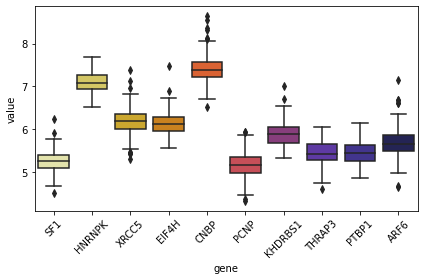

In [58]:
colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r',]

sns.boxplot (x = 'gene', y = 'value', data = dQ, palette = "CMRmap_r")
plt.xticks(rotation=45) 
plt.tight_layout()


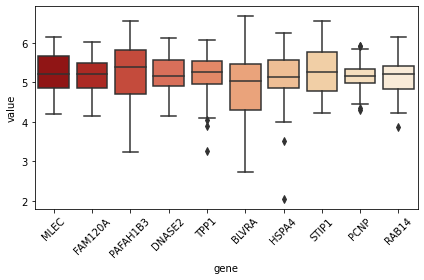

In [61]:
min_max = df1.sort_values(by=['max-min'], ascending = True).iloc[0:10]
min_max['gene'] = min_max.index
min_max = pd.melt(min_max, id_vars = 'gene', value_vars = min_max.columns[:-4])

sns.boxplot (x = 'gene', y = 'value', data = min_max, palette = "OrRd_r")
plt.xticks(rotation=45) 
plt.tight_layout()


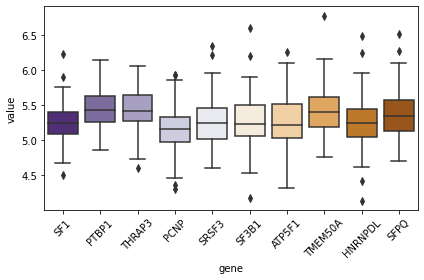

In [66]:
D = df1.sort_values(by=['D'], ascending = True).iloc[0:10]
D['gene'] = D.index
D = pd.melt(D, id_vars = 'gene', value_vars = D.columns[:-4])

sns.boxplot (x = 'gene', y = 'value', data = D, palette = "PuOr_r")
plt.xticks(rotation=45) 
plt.tight_layout()

### 5 Используя файл breast_cancer_key_genes.tsv, нарисоватьсовместный kdeplot для генов ESR1 и PGR в выборке опухолеймолочной железы. Выделить и охарактеризовать три подгруппыпациентов.

In [60]:
df2 = pd.read_csv('https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar11/breast_cancer_key_genes.tsv', sep = '\t', index_col = 0)
df2.head()


,ESR1,PGR,ERBB2,MKI67
TCGA-3C-AAAU-01A,3.691075,2.975339,5.043666,3.314383
TCGA-3C-AALI-01A,0.336400,0.110920,9.717665,3.107031
TCGA-3C-AALJ-01A,4.688752,1.291904,5.630728,2.085183
TCGA-3C-AALK-01A,3.221422,2.930038,7.311545,2.298665
TCGA-4H-AAAK-01A,4.355086,3.867628,5.844283,2.416418


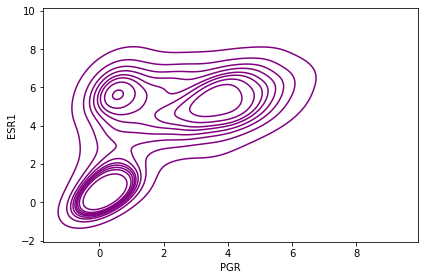

In [ ]:
sns.kdeplot(x = df2['PGR'], y = df2['ESR1'], color = 'purple')
plt.tight_layout()